In [ ]:
#_________________ Applied Statistics 2024/2025 _________________________________

#### 7.2.Hidden Markov models [depmixS4 package]  ####
#____________________________________________________#

In [1]:
### Summary:
### - EXAMPLE 0: A simulated example for understanding how to use the depmixS4 package
### - EXAMPLE 1: Bob, Alice, the dice and the jelly beans
### - EXAMPLE 2: Hidden Markov Models for Regime Detection in Stock Market Data
###              - Simulated
###              - Real data

In [ ]:
# Import Libraries 
install.packages("depmixS4")

library(depmixS4)
library(ggplot2)
library(gridExtra)
library(reshape2)
library(dplyr)
library(quantmod)
library(xts)
library(zoo)
library(nnet)
library(MASS)
library(Rsolnp)
library(nlme)
library(TTR)

also installing the dependencies 'truncnorm', 'Rsolnp'





The downloaded binary packages are in
	/var/folders/2n/xc_5x6ys00q7kj5lcfn2s10r0000gn/T//Rtmpln4Eeu/downloaded_packages


Loading required package: nnet

Loading required package: MASS

Loading required package: Rsolnp

Loading required package: nlme



ERROR: Error in library(gridExtra): there is no package called 'gridExtra'


In [4]:
#_______________________________________________________________________________

y
<int>
0
2
1
0
1
1
0
0
1


converged at iteration 1 with logLik: -159.3054 
Initial state probabilities model 
pr1 
  1 

Transition matrix 
       toS1
fromS1    1

Response parameters 
Resp 1 : poisson 
    Re1.(Intercept)
St1           0.365
converged at iteration 27 with logLik: -145.528 
Initial state probabilities model 
pr1 pr2 
  0   1 

Transition matrix 
       toS1 toS2
fromS1 1.00 0.00
fromS2 0.02 0.98

Response parameters 
Resp 1 : poisson 
    Re1.(Intercept)
St1           0.756
St2          -0.278
Initial state probabilities model 
pr1 pr2 pr3 
  0   1   0 

Transition matrix 
        toS1  toS2  toS3
fromS1 0.433 0.534 0.033
fromS2 0.861 0.139 0.000
fromS3 0.000 0.000 1.000

Response parameters 
Resp 1 : poisson 
    Re1.(Intercept)
St1          -0.179
St2          -0.446
St3           0.756


state,S1,S2
<dbl>,<dbl>,<dbl>
2,0.000000000,1.0000000
2,0.039130429,0.9608696
2,0.028776837,0.9712232
2,0.007608373,0.9923916
2,0.014276317,0.9857237
2,0.014276317,0.9857237
2,0.005124371,0.9948756
2,0.005124371,0.9948756
2,0.014276317,0.9857237


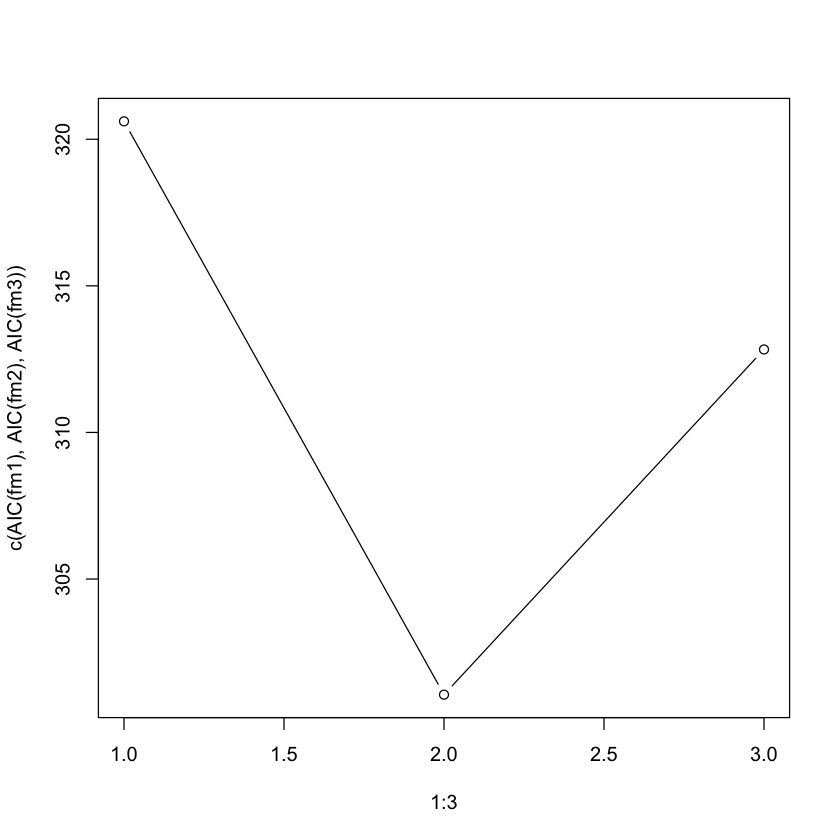

state,S1,S2,S3
<dbl>,<dbl>,<dbl>,<dbl>
2,0.0000000,1.0000000,0.000000e+00
1,0.8970602,0.1029398,1.737400e-11
2,0.4538498,0.5219806,2.416964e-02
1,0.5985930,0.3925849,8.822033e-03
2,0.5203821,0.4583926,2.122528e-02
1,0.5905275,0.3872952,2.217728e-02
2,0.4611816,0.5304130,8.405421e-03
1,0.6006101,0.3939078,5.482165e-03
2,0.5203821,0.4583926,2.122528e-02


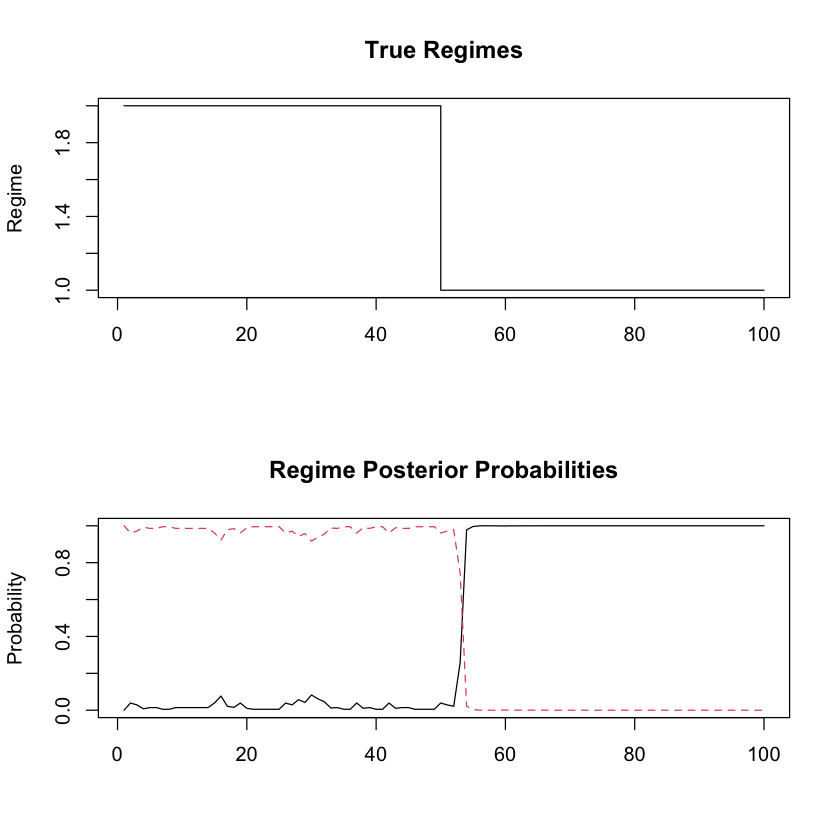

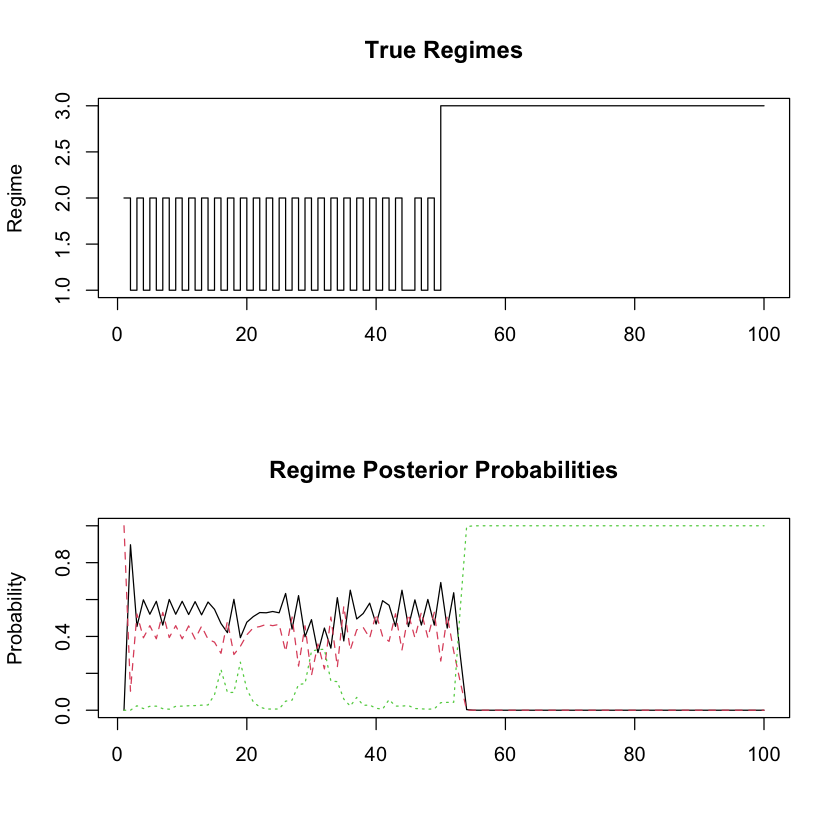

Poisson                 package:stats                  R Documentation

_T_h_e _P_o_i_s_s_o_n _D_i_s_t_r_i_b_u_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Density, distribution function, quantile function and random
     generation for the Poisson distribution with parameter 'lambda'.

_U_s_a_g_e:

     dpois(x, lambda, log = FALSE)
     ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)
     qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)
     rpois(n, lambda)
     
_A_r_g_u_m_e_n_t_s:

       x: vector of (non-negative integer) quantiles.

       q: vector of quantiles.

       p: vector of probabilities.

       n: number of random values to return.

  lambda: vector of (non-negative) means.

log, log.p: logical; if TRUE, probabilities p are given as log(p).

lower.tail: logical; if TRUE (default), probabilities are P[X <= x],
          otherwise, P[X > x].

_D_e_t_a_i_l_s:

     The Poisson distribution has density

              

In [5]:
##### EXAMPLE 0: A simulated example for understanding how to use the HMM package #####

# this creates data with a single change point with Poisson data
set.seed(3)
?rpois # rpois(n, lambda), where n is number of random values to return and lambda vector of means
y1 <- rpois(50,1)
y2 <- rpois(50,2)
ydf <- data.frame(y=c(y1,y2))
ydf

# fit models with 1 to 3 states
m1 <- depmix(y~1, ns=1, family=poisson(), data=ydf)
set.seed(1)
fm1 <- fit(m1)
summary(fm1)

m2 <- depmix(y~1, ns=2, family=poisson(), data=ydf)
set.seed(1)
fm2 <- fit(m2)
summary(fm2)

m3 <- depmix(y~1, ns=3, family=poisson(), data=ydf)
set.seed(1)
fm3 <- fit(m3, em=em.control(maxit=500))
summary(fm3)

# plot the AICs to select the proper model
plot(1:3,c(AIC(fm1),AIC(fm2),AIC(fm3)),ty="b")



post_probs2 <- posterior(fm2, type = 'viterbi')
post_probs2

layout(1:2)
plot(post_probs2$state, type='s', main='True Regimes', xlab='', ylab='Regime')
matplot(post_probs2[,-1], type='l', main='Regime Posterior Probabilities', ylab='Probability')



post_probs3 <- posterior(fm3, type = 'viterbi')
post_probs3

layout(1:2)
plot(post_probs3$state, type='s', main='True Regimes', xlab='', ylab='Regime')
matplot(post_probs3[,-1], type='l', main='Regime Posterior Probabilities', ylab='Probability')


In [ ]:
#_______________________________________________________________________________
##### EXAMPLE 1: Bob, Alice, the dice and the jelly beans #####
# Source: https://www.r-bloggers.com/2018/11/hidden-markov-model-example-in-r-with-the-depmixs4-package/

# There are 2 dice and a jar of jelly beans. 
# Bob rolls the dice, if the total is > 4 he takes a handful of jelly beans 
# and rolls again. 
# Otherwise he takes a handful jelly beans then hands the dice to Alice. 
# If Alice rolls greater than 4 she takes a handful of jelly beans;
# however she isn't a fan of any other color than the black ones so she puts the others back, 
# --> therefore we would expect Bob to take more than Alice. 
# They do this until the jar is empty.

# Now assume Alice and Bob are in a different room and we can't see who is rolling the dice. 
# Instead we only know how many jelly beans were taken after the roll. 
# We don't know the color, simply the final number of jelly beans that were removed 
# from the jar on that turn. 
# How could we know who rolled the dice?
# HMMs:
# - The state is the person who rolled the dice, Alice or Bob. 
# - The observation is how many jelly beans were removed on that turn. 
# - The roll of the dice and the condition of passing the dice if the value is <= 4
#   is the transition probability. 

# Firstly, we'll simulate the example. On average Bob takes 12 jelly beans and Alice takes 4.

# the setup function: "simulate"
simulate <- function(N, dice.val = 6, jbns, switch.val = 4){ 
  # dice.val is the maximum number of the die
  # switch.val is the value strictly below which the dice is passed
  # jbns is vector of the averages of the jelly beans taken by Bob & Alice
  
  # simulate variables
  bob.dice <- sample(1:dice.val, N, replace = T) + sample(1:dice.val, N, replace = T) # we sum since we have 2 dice
  alice.dice <- sample(1:dice.val, N, replace = T) + sample(1:dice.val, N, replace = T)
  # for the extraction from the jar of jelly beans
  bob.jbns <- rpois(N, jbns[1])   # jbns[1] is the average of the poisson for Bob
  alice.jbns <- rpois(N, jbns[2]) # jbns[2] is the average of the poisson for Alice
  
  # states 
  draws <- data.frame(state = rep(NA, N), obs = rep(NA, N), dice = rep(NA, N))
  draws$state[1] <- "alice"
  draws$obs <- alice.jbns[1]
  draws$dice <- alice.dice[1]
  for(k in 2:N){
    if(draws$state[k-1] == "alice"){
      if(draws$dice[k-1] < switch.val+1){
        draws$state[k] <- "bob"
        draws$obs[k] <- bob.jbns[k]
        draws$dice[k] <- bob.dice[k]
      }else{
        draws$state[k] <- "alice"
        draws$obs[k] <- alice.jbns[k]
        draws$dice[k] <- alice.dice[k]
      }
    }else if(draws$state[k-1] == "bob"){
      if(draws$dice[k-1] < switch.val+1){
        draws$state[k] <- "alice"
        draws$obs[k] <- alice.jbns[k]
        draws$dice[k] <- alice.dice[k]
      }else{
        draws$state[k] <- "bob"
        draws$obs[k] <- bob.jbns[k]
        draws$dice[k] <- bob.dice[k]
      }
    }
  }
  # return
  return(cbind(roll = 1:N, draws))
}

# simulate scenario
set.seed(20181031)
N <- 100
draws <- simulate(N, jbns = c(12, 4), switch.val = 4)

# observe results
mycols <- c("darkmagenta", "turquoise")
cols <- ifelse(draws$state == "alice", mycols[1], mycols[3])
x11()
ggplot(draws, aes(x = roll, y = obs)) + geom_line()
# it's difficult from simply inspecting the series of counts determine who rolled the dice! 


fit.hmm <- function(draws){

  # HMM with depmix
  mod <- depmix(obs ~ 1, data = draws, nstates = 2, family = poisson()) 
                                                  # use gaussian() for normally distributed data
  fit.mod <- fit(mod)
  
  # predict the states by estimating the posterior
  est.states <- posterior(fit.mod, type = "viterbi")
  print(head(est.states))
  
  # results
  tbl <- table(est.states$state, draws$state)
  draws$est.state.labels <- c(colnames(tbl)[which.max(tbl[1,])], 
                              colnames(tbl)[which.max(tbl[2,])])[est.states$state]
  est.states$roll <- 1:N
  colnames(est.states)[2:3] <- c(colnames(tbl)[which.max(tbl[1,])], 
                                 colnames(tbl)[which.max(tbl[2,])])
  hmm.post.df <- melt(est.states, measure.vars = c("alice", "bob"))
  
  # print the table
  print(table(draws[,c("state", "est.state.labels")]))
  
  # return it
  return(list(draws = draws, hmm.post.df = hmm.post.df))
}

hmm1 <- fit.hmm(draws)
head(hmm1$hmm.post.df)
head(hmm1$draws)


# plot output
plot.hmm.output <- function(model.output){
  model.output$draws$state_num = ifelse(model.output$draws$state == 'alice', 1, 0)
  model.output$draws$est.state.labels_num = ifelse(model.output$draws$est.state.labels == 'alice', 1, 0)
  g0 <- (ggplot(model.output$draws, aes(x = roll, y = obs)) + geom_line() +
           theme(axis.ticks = element_blank(), axis.title.y = element_blank())) %>% ggplotGrob
  g1 <- (ggplot(model.output$draws, aes(x = roll, y = state_num, colour = factor(state_num))) +
           geom_point() +
           theme(axis.ticks = element_blank(), axis.text.y = element_blank()) +
           labs(y = "Actual State", colour = "State:\nPerson that\nrolled the\ndice") + 
           scale_color_manual(labels = c("bob", "alice"), values=c("turquoise", "darkmagenta"))) %>% ggplotGrob
  g2 <- (ggplot(model.output$draws, aes(x = roll, y = est.state.labels_num, colour = factor(est.state.labels_num))) +
           geom_point() + 
           theme(axis.ticks = element_blank(), axis.text.y = element_blank()) +
           labs(y = "Estimated State", colour = "State:\nPerson that\nrolled the\ndice") + 
           scale_color_manual(labels = c("bob", "alice"), values=c("turquoise", "darkmagenta"))) %>% ggplotGrob
  g3 <- (ggplot(model.output$hmm.post.df, aes(x = roll, y = value, col = variable)) + geom_line() +
           scale_color_manual(values = mycols, name = "State:\nPerson that\nrolled the\ndice", labels = c("Alice", "Bob")) +
           theme(axis.ticks = element_blank(), axis.text.y = element_blank()) + 
           labs(y = "Posterior Prob.")) %>% ggplotGrob()
  g0$widths <- g1$widths
  return(grid.arrange(g0, g1, g2, g3, widths = 1, nrow = 4))
}

x11()
plot.hmm.output(hmm1)


# What if the transition probabilities were much greater?
# we set switch.val = 7
draws <- simulate(100, jbns = c(12, 4), switch.val = 7)
cols <- ifelse(draws$state == "alice", mycols[1], mycols[3])
hmm2 <- fit.hmm(draws)
x11()
plot.hmm.output(hmm2)
# It is noiser data but the HMM still does a great job! 


# What if the observations are drawn from the same distribution 
# i.e. Alice and Bob take the same amount of jelly beans?
draws <- simulate(100, jbns = c(12, 12), switch.val = 4)
cols <- ifelse(draws$state == "alice", mycols[1], mycols[3])
hmm3 <- fit.hmm(draws)
x11()
plot.hmm.output(hmm3)

# (When it works) Not so great, but that's to be expected. 
# If there is no difference between the distributions from which the observations 
# are drawn then there may as well be only 1 state.



#_______________________________________________________________________________
##### EXAMPLE 2: Hidden Markov Models for Regime Detection in Stock Market Data #####
# Sources: 
# https://www.quantstart.com/articles/hidden-markov-models-for-regime-detection-using-r/
# https://medium.com/analytics-vidhya/hidden-markov-models-for-time-series-in-r-studio-5ae2b9fb0701

# A simulation of streamed market returns across two separate regimes - "bullish" and "bearish" -.
# A Hidden Markov Model will be fitted to the returns stream to identify the probability 
# of being in a particular regime state.

set.seed(1)

# Simulated returns data will be generated from separate Gaussian distributions, 
# each of which represents a "bullish" or "bearish" market regime. 

# The 'bullish' returns draw from a Gaussian distribution with positive mean and low variance, 
# while the 'bearish' returns draw from a Gaussian distribution with slight negative mean 
# but higher variance.

# Five separate market regime periods will be simulated. 

# The goal of the Hidden Markov Model will be to identify when the regime 
# has switched from bullish to bearish and viceversa.


# SIMULATED EXAMPLE

# Create the parameters for the bull and
# bear market returns distributions
Nk_lower <- 50
Nk_upper <- 150
bull_mean <- 0.1
bull_sd <- 0.1
bear_mean <- -0.05
bear_sd <- 0.2

# Create the list of durations (in days) for each regime
days <- replicate(5, sample(Nk_lower:Nk_upper, 1))
days

# Create the various bull and bear markets returns
market_bull_1 <- rnorm( days[1], bull_mean, bull_sd )  # BULL
market_bear_2 <- rnorm( days[2], bear_mean, bear_sd )  # BEAR
market_bull_3 <- rnorm( days[3], bull_mean, bull_sd )  # BULL
market_bear_4 <- rnorm( days[4], bear_mean, bear_sd )  # BEAR
market_bull_5 <- rnorm( days[5], bull_mean, bull_sd )  # BULL

# Create the list of true regime states and full returns list
# 1 stands for BULL and 2 stands for BEAR
true_regimes <- c(rep(1,days[1]), rep(2,days[2]), rep(1,days[3]), rep(2,days[4]), rep(1,days[5]))
true_regimes
returns <- c(market_bull_1, market_bear_2, market_bull_3, market_bear_4, market_bull_5)
returns

x11()
plot(returns, type="l", xlab='', ylab="Returns") 
# Plotting the returns shows the clear changes in mean and variance between the regime switches

# Create and fit the Hidden Markov Model
hmm <- depmix(returns ~ 1, family = gaussian(), nstates = 2, data=data.frame(returns=returns))
hmmfit <- fit(hmm, verbose = FALSE) 
# Should optimization information be displayed on screen? If yes, set verbose=TRUE 

# Output both the true regimes and the 
# posterior probabilities of the regimes
post_probs <- posterior(hmmfit, type = 'viterbi')
post_probs
x11()
layout(1:2)
plot(post_probs$state, type='s', main='True Regimes', xlab='', ylab='Regime')
matplot(post_probs[,-1], type='l', main='Regime Posterior Probabilities', ylab='Probability')
legend(x='topright', c('Bull','Bear'), fill=1:2, bty='n')
# 1 stands for BULL and 2 stands for BEAR

graphics.off()


# FINANCIAL DATA: real example on Stock Market data
# Stock forecasting is still severely limited due to its non-stationary, seasonal, 
# and unpredictable nature.
# The price of the stock depends upon a multitude of factors, 
# which generally remain invisible to the investor (hidden variables). 

# Before, it was straightforward for the Hidden Markov Model 
# to determine regimes because they had been simulated from pre-specified set of Gaussians.

# The problem of Regime Detection is actually an Unsupervised Learning challange
# since the number of states is not known a-priori, nor is there any "ground truth" 
# on which to "train" the HMM.

# In this section two separate modelling tasks will be carried out. 
# The first will involve fitting the HMM with two regime states to S&P500 returns, 
# while the second will utilize three states. 

# S&P500 is a stock market index tracking the stock performance of 500 large companies 
# listed on stock exchanges in the United States. 
# It is one of the most commonly followed equity indices. 

# The dataset is available through 'quantmod' library in R 
# and contains the information related to a particular stock’s performance. 


# Obtain S&P500 data from 2004 onwards and create the returns stream from this
getSymbols("^GSPC", from="2004-01-01")
chartSeries(GSPC, theme='black')
gspcRets = diff( log( Cl( GSPC ) ) ) 
?Cl #close
gspcRets = gspcRets[-1,]
returns = as.numeric(gspcRets)

plot(gspcRets)


# Fit a Hidden Markov Model with two states 
# to the S&P500 returns stream
hmm <- depmix(returns ~ 1, family = gaussian(), nstates = 2, data=data.frame(returns=returns))
hmmfit <- fit(hmm, verbose = FALSE)
summary(hmmfit)
post_probs <- posterior(hmmfit, type='viterbi')

# Plot the returns stream and the posterior
# probabilities of the separate regimes
x11()
layout(1:2)
post_probs$date = index(gspcRets)
plot(x = post_probs$date, y = returns, type='l', main='Regime Detection', xlab='', ylab='Returns')
matplot(x = post_probs$date, y = post_probs[,c(2,3)], type='l', main='Regime Posterior Probabilities', ylab='Probability') 
legend(x='bottomleft', c('Regime #1','Regime #2'), fill=1:2, bty='n')


# Notice that within 2004 and 2007 the markets were calmer and hence the HMM 
# has given high posterior probability to Regime #2 for this period. 
# However between 2007-2009 the markets were incredibly volatile due to the sub-prime crisis. 
# This has the initial effect of rapidly changing the posterior probabilities 
# between the two states but being fairly consistently in Regime #1 during 2008 itself.

# The markets became calmer in 2010 but additional volatility occurred in 2011, 
# leading once again for the HMM to give high posterior probability to Regime #1. 
# Subsequent to 2011 the markets became calmer once again and the HMM is consistently giving 
# high probability to Regime #2. In 2015 the markets once again became choppier 
# and this is reflected in the increased switching between regimes for the HMM.

GSPC_Predict = post_probs$state
chartSeries(GSPC)
addTA(GSPC[GSPC_Predict==1,1], on=1, type='p', col=5, pch=10)
addTA(GSPC[GSPC_Predict==2,1], on=1, type='p', col=6, pch=25)

# We can see how our hidden states are mapped to the stock market graph. 
# This gives us an idea about the different sequences of hidden states 
# in the data and can infer a few insights from the hidden states obtained


graphics.off()

# The same process will now be carried out for a three-state HMM:
# Fit a Hidden Markov Model with three states 
# to the S&P500 returns stream
hmm <- depmix(returns ~ 1, family = gaussian(), nstates = 3, data=data.frame(returns=returns))
hmmfit <- fit(hmm, verbose = FALSE)
summary(hmmfit)
post_probs <- posterior(hmmfit, type='viterbi')

# Plot the returns stream and the posterior
# probabilities of the separate regimes
layout(1:2)
post_probs$date = index(gspcRets)
plot(x = post_probs$date, y = returns, type = 'l', main = 'Regime Detection', xlab = '', ylab = 'Returns')
matplot(x = post_probs$date, y = post_probs[,c(2,3,4)], type = 'l', main = 'Regime Posterior Probabilities', ylab = 'Probability')
legend(x='topright', c('Regime #1','Regime #2', 'Regime #3'), fill = 1:3, bty = 'n', cex = 0.75)

# The length of data makes the posterior probabilities chart somewhat trickier to interpret. 
# Since the model is forced to consider three separate regimes it leads to a 
# switching behaviour between Regime #2 and Regime #3 in the calmer period of 2004-2007. 
# However in the volatile periods of 2008, 2010 and 2011, Regime #1 dominates 
# the posterior probability indicating a highly volatile state. 
# Subsequent to 2011 the model reverts to switching between Regime #2 and Regime #3.

# It is clear that choosing the initial number of states to apply to a real 
# returns stream is a challenging problem. 
# It will depend upon the asset class being utilized, how the trading for that asset 
# is carried out as well as the time period chosen.

GSPC_Predict = post_probs$state

chartSeries(GSPC)
addTA(GSPC[GSPC_Predict==1,1], on=1, type='p', col=5, pch=10)
addTA(GSPC[GSPC_Predict==2,1], on=1, type='p', col=6, pch=25)
addTA(GSPC[GSPC_Predict==3,1], on=1, type='p', col=7, pch=24)



detach("package:depmixS4", unload = TRUE)


